# Projeto Consulta de Ações

Passo a passo do problema

- Sistema que busca informações de uma Ação da Bolsa de valores de forma automática
- Criar as análises solicitadas
    - Cotação Máxima
    - Cotação Mínima
    - Valor Médio
- Enviar um e-mail automaticamente para o gestor

#### Buscar os dados da ação informada

Bibliotecas: `yfinance` e `matplotlib`

Requerido para o sistema:

`pip install yfinance`
`pip install matplotlib`

In [14]:
import yfinance as _Fin

<Axes: xlabel='Date'>

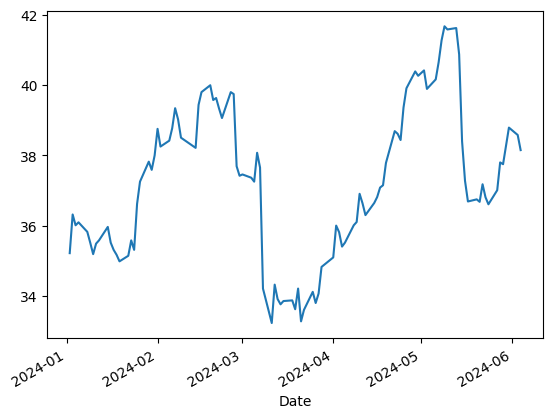

In [23]:
ticker = input("Digite o código da Ação: ")
dt_inicial = input("Informe a data inicial: ")
dt_final = input("Informe a data final: ")

dados = _Fin.Ticker(ticker).history(start=dt_inicial, end=dt_final)
fechamento = dados.Close
fechamento
fechamento.plot()

#### Criar as Análises solicitadas

- Cotação Máxima
- Cotação Mínima
- Valor Médio

In [24]:
fechamento

Date
2024-01-02 00:00:00-03:00    35.221188
2024-01-03 00:00:00-03:00    36.321266
2024-01-04 00:00:00-03:00    36.013618
2024-01-05 00:00:00-03:00    36.097523
2024-01-08 00:00:00-03:00    35.827168
                               ...    
2024-05-28 00:00:00-03:00    37.799999
2024-05-29 00:00:00-03:00    37.750000
2024-05-31 00:00:00-03:00    38.790001
2024-06-03 00:00:00-03:00    38.580002
2024-06-04 00:00:00-03:00    38.150002
Name: Close, Length: 106, dtype: float64

Precisamos coletar as informações listadas acima e converter para uma forma mais simples de leitura.

Usar a função `round()` para converter os valores para uma leitura mais próxima da moeda corrente.

In [25]:
maxima = round(fechamento.max(), 2)
minima = round(fechamento.min(), 2)
media = round(fechamento.mean(), 2)

print(maxima)
print(minima)
print(media)


41.67
33.24
37.19


#### Enviando e-mail de forma automática

Necessário instalar a biblioteca `pyautogui`

Comando: `pip install pyautogui`

As coordenadas utilizadas no código irão variar de acordo com o monitor e a resolução de tela que está sendo utilizado. Código abaixo mapeia a informação necessária.

In [30]:
import time
import pyautogui

time.sleep(5)

print(pyautogui.position())


Point(x=840, y=687)


In [31]:
import pyperclip
import pyautogui
import webbrowser
from time import sleep

destinatario = "werdelessoares@gmail.com"
assunto = "Analise de Ações"

mensagem = f"""
Saudações

Segue abaixo as análises da ação {ticker} do periodo solicitado {dt_inicial} a {dt_final}:

Cotação máxima: R$ {maxima}
Cotação mínima: R$ {minima}
Valor médio: R$ {media}

Attr

"""

# configurando a pausa de ação do bot
pyautogui.PAUSE = 5

# abrir navegador no gmail
webbrowser.open("www.gmail.com")
sleep(3)

# clicar no botão de "escrever"
pyautogui.click(x=76, y=203)

# preencher para

pyperclip.copy(destinatario)
pyautogui.hotkey("ctrl","v")
pyautogui.hotkey("tab")

# preencher assunto
pyperclip.copy(assunto)
pyautogui.hotkey("ctrl","v")
pyautogui.hotkey("tab")

# clicar no botão enviar
pyautogui.click(x=840, y=687)

# fechar a aba
pyautogui.hotkey("ctrl","f4")

print("E-mail enviado com sucesso!!!")

E-mail enviado com sucesso!!!
